In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.datasets import fashion_mnist

In [10]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [11]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [12]:
X_valid, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]

In [13]:
model = Sequential()
model.add(Conv2D(64, (5, 5),
                    padding="same",
                    activation="relu",
                    input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), padding="same",
                    activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), padding="same",
                    activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 128)         409728    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 128)       

In [16]:
history = model.fit(
    X_train,
    y_train,
    epochs=8,
    batch_size=128,
    validation_data=(X_valid, y_valid)
)

Epoch 1/8
430/430 [==============================] - 537s 1s/step - loss: 0.5186 - accuracy: 0.8124 - val_loss: 0.3483 - val_accuracy: 0.8764
Epoch 2/8
430/430 [==============================] - 520s 1s/step - loss: 0.3122 - accuracy: 0.8862 - val_loss: 0.2709 - val_accuracy: 0.9024
Epoch 3/8
430/430 [==============================] - 519s 1s/step - loss: 0.2592 - accuracy: 0.9048 - val_loss: 0.2652 - val_accuracy: 0.9042
Epoch 4/8
430/430 [==============================] - 519s 1s/step - loss: 0.2265 - accuracy: 0.9168 - val_loss: 0.2488 - val_accuracy: 0.9120
Epoch 5/8
430/430 [==============================] - 518s 1s/step - loss: 0.2011 - accuracy: 0.9271 - val_loss: 0.2227 - val_accuracy: 0.9176
Epoch 6/8
430/430 [==============================] - 518s 1s/step - loss: 0.1757 - accuracy: 0.9351 - val_loss: 0.2160 - val_accuracy: 0.9206
Epoch 7/8
430/430 [==============================] - 518s 1s/step - loss: 0.1583 - accuracy: 0.9408 - val_loss: 0.2125 - val_accuracy: 0.9216
Epoch 

In [17]:
results = model.evaluate(X_test, y_test)
print(results)

313/313 [==============================] - 25s 78ms/step - loss: 32.8692 - accuracy: 0.8838
[32.8691520690918, 0.8838000297546387]


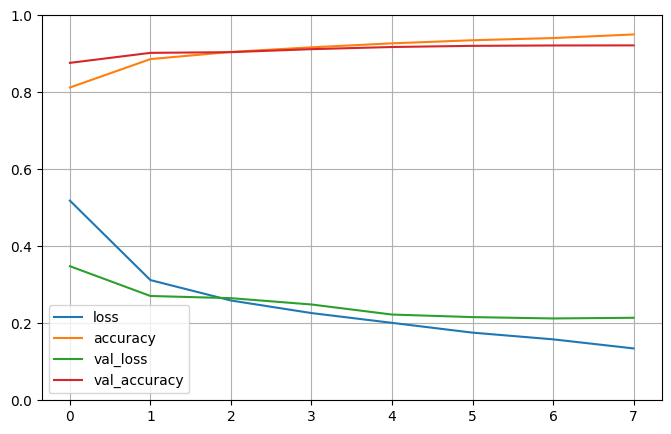

In [18]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

313/313 [==============================] - 25s 78ms/step


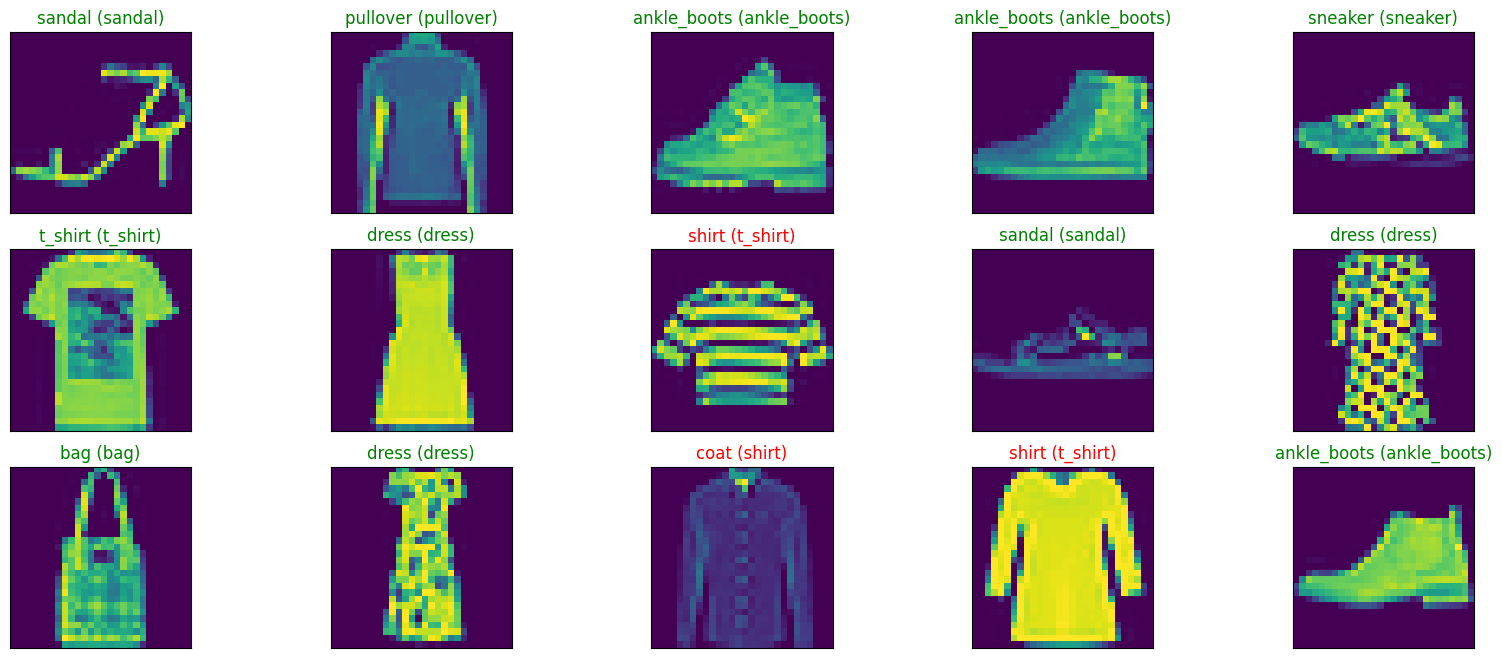

In [19]:
fashion_mnist_labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
y_hat = model.predict(X_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = y_test[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index],
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))